In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('C:/Users/fmerc/Downloads/advertising.csv', index_col=0)


In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- **TV**: gasto en publicidad en TV
- **Radio**: gasto en publicidad en radio
- **Newspaper**: gasto en publicidad en periódico
  
Todos en miles de dólares

- **Sales**: ventas del producto publicitado en miles de unidades

### Estadísticas descriptivas

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Incluir seaborn para Visualización

In [7]:
import seaborn as sns

In [8]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

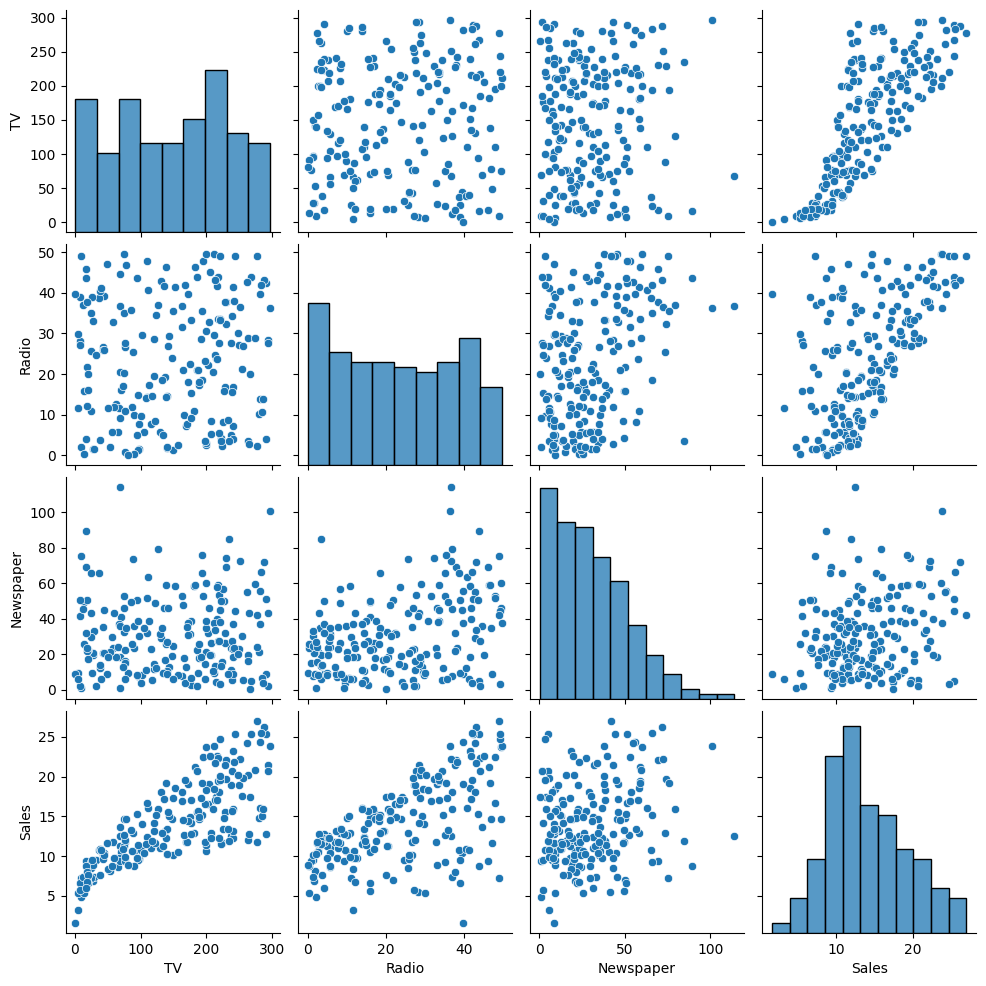

In [9]:
sns.pairplot(data,)

### Matriz de correlación

<Axes: >

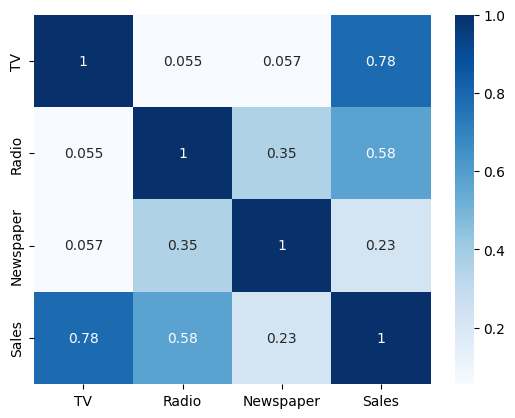

In [10]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

<Axes: >

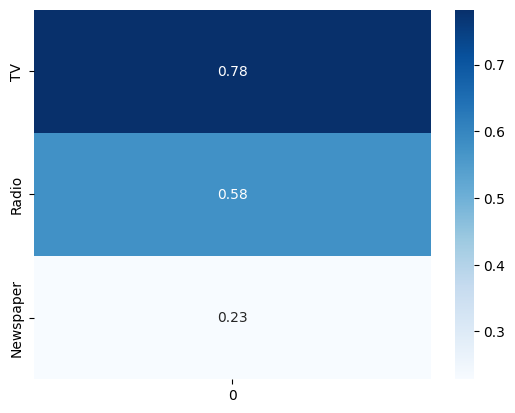

In [11]:
corrw = data.drop(['Sales'], axis=1).corrwith(data['Sales'])
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

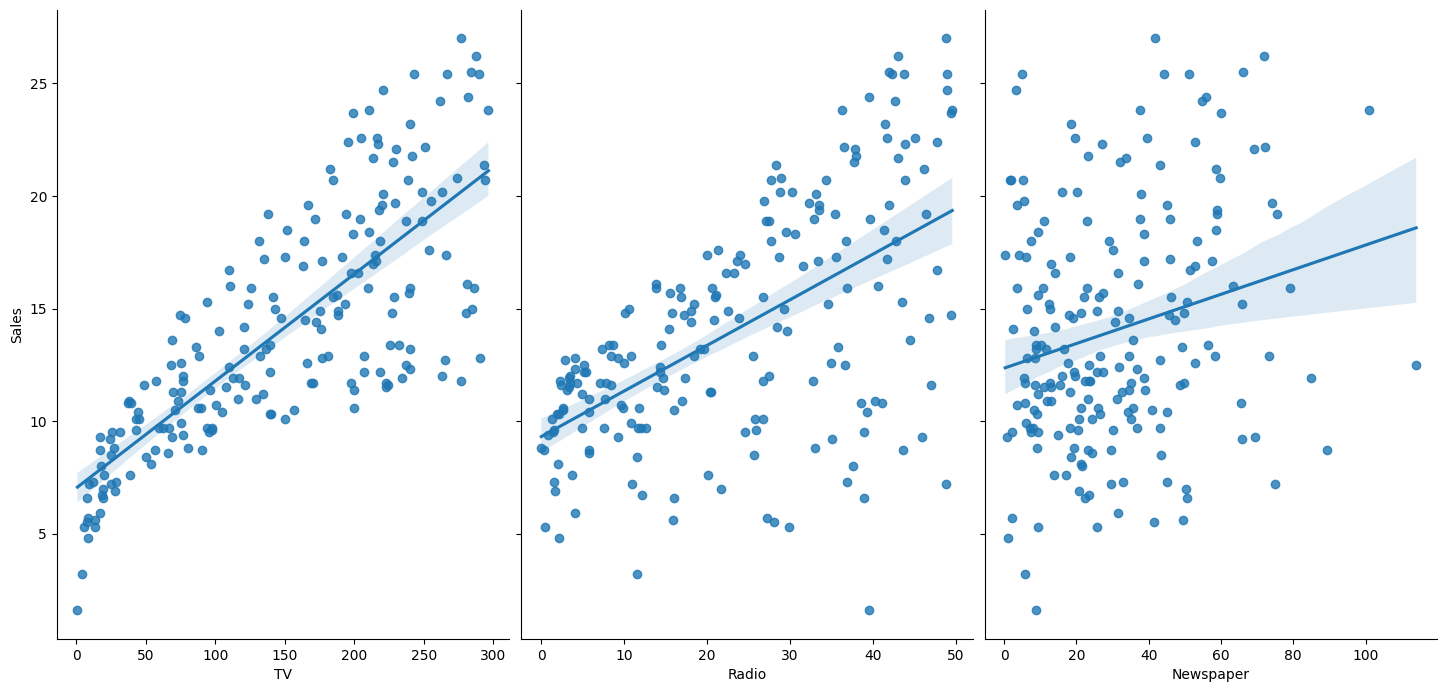

In [12]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

### Modelo de regresión 

$y = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper}$

In [13]:
# nombres de características
features = ['TV', 'Radio', 'Newspaper']

# dataframe de características
X = data[features]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
X.shape

(200, 3)

In [15]:
# variable de respuesta
y = data['Sales']

y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [16]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
print(X.head())
print(X_train.head())

In [ ]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [ ]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# sin reordenar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, shuffle=False)

In [ ]:
print(X.head())
print(X_train.head())

In [ ]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

In [ ]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

### Predicciones usando los datos de prueba

In [ ]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
from sklearn import metrics

In [ ]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [ ]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

### Selección de variables - Modelo con otro subconjunto de variables

In [ ]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

### Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

In [ ]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

In [ ]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

## Ahora usando statsmodels

In [ ]:
import statsmodels.api as sm

features = ['TV', 'Radio', 'Newspaper']

X = data[features]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

### El segundo modelo, sin Newspaper

In [ ]:
featuresb = ['TV', 'Radio']

X = data[featuresb]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

### Determinar la influencia de las observaciones

In [ ]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [ ]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

In [ ]:
X_train[out_d]

In [ ]:
y_train[out_d]